## Project Overview
### The goal of this project is to analyze data related to a marketing campaign and subsequently develop a machine learning model that can predict customers' response to the campaign.  

### The overall benefit of this application is the efficient allocation of marketing and advitersing budget.

In [2]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Loading the Marketing data
data = pd.read_csv('marketing_campaign.csv', delimiter=';')
data.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


# Exploratory Data Analysis

In [4]:
# Checking for missing values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
# Checking the data type of each column shows that there ar 3 object type columns
# object type columns would have to be encoded
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
''' 
Defined a function to drop ID column, 
fill the missing values in Income with the mean of income
and create the day, month, year columns from Dt_Customer
'''

' \nDefined a function to drop ID column, \nfill the missing values in Income with the mean of income\nand create the day, month, year columns from Dt_Customer\n'

In [7]:
def eda_inputs(df):
    df.copy()

    #Drop ID column
    df = df.drop('ID', axis=1)

    #Fill missing values in Income column with column mean
    df['Income']= df['Income'].fillna(df['Income'].mean())

    #Encoding the date column
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']) #convert to datetime 
    df['Year_Customer'] = df['Dt_Customer'].apply(lambda x: x.year) # creat a year column
    df['Month_Customer'] = df['Dt_Customer'].apply(lambda x: x.month) # creat a year column
    df['Day_Customer'] = df['Dt_Customer'].apply(lambda x: x.day)
    df = df.drop('Dt_Customer', axis=1) # drop the original date column

    return df 

In [9]:
edf = eda_inputs(data)
edf.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer,Day_Customer
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,9,4
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,3,8
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,8,21
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,2,10
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,1,19


<AxesSubplot:xlabel='Year_Customer', ylabel='count'>

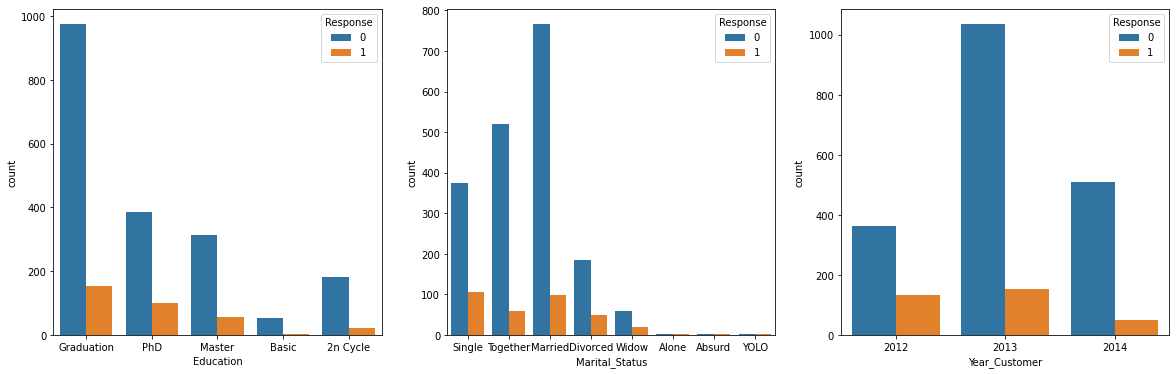

In [10]:
# Plotting some categorical variables to observe their relationship with the response variable

# Campaign Response based on education, marital status, year of customer acquisition
fig, axs=plt.subplots(ncols=3, figsize=(20,6)) 
sns.countplot(x="Education", hue="Response", data=edf, ax=axs[0])
sns.countplot(x="Marital_Status", hue="Response", data=edf, ax=axs[1])
sns.countplot(x="Year_Customer", hue="Response", data=edf, ax=axs[2])

<AxesSubplot:xlabel='AcceptedCmp5', ylabel='count'>

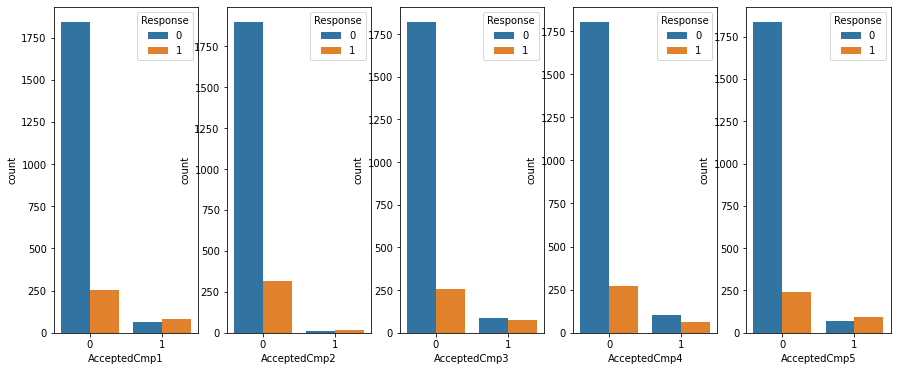

In [11]:
# Current campaign response based on previous campaign response
fig, axs=plt.subplots(ncols=5, figsize=(15,6))
sns.countplot(x="AcceptedCmp1",hue='Response', data=edf, ax=axs[0])
sns.countplot(x="AcceptedCmp2",hue='Response', data=edf, ax=axs[1])
sns.countplot(x="AcceptedCmp3",hue='Response', data=edf, ax=axs[2])
sns.countplot(x="AcceptedCmp4",hue='Response', data=edf, ax=axs[3])
sns.countplot(x="AcceptedCmp5",hue='Response', data=edf, ax=axs[4])

<AxesSubplot:xlabel='Complain', ylabel='count'>

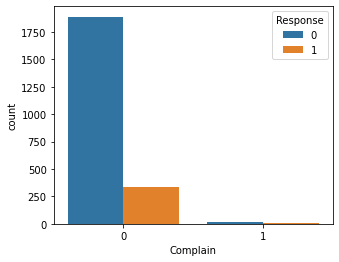

In [12]:
# Campaign Response based on Complain record in the last 2yrs
fig, ax=plt.subplots(figsize=(5,4))
sns.countplot(x="Complain",hue='Response', data=edf)

<AxesSubplot:>

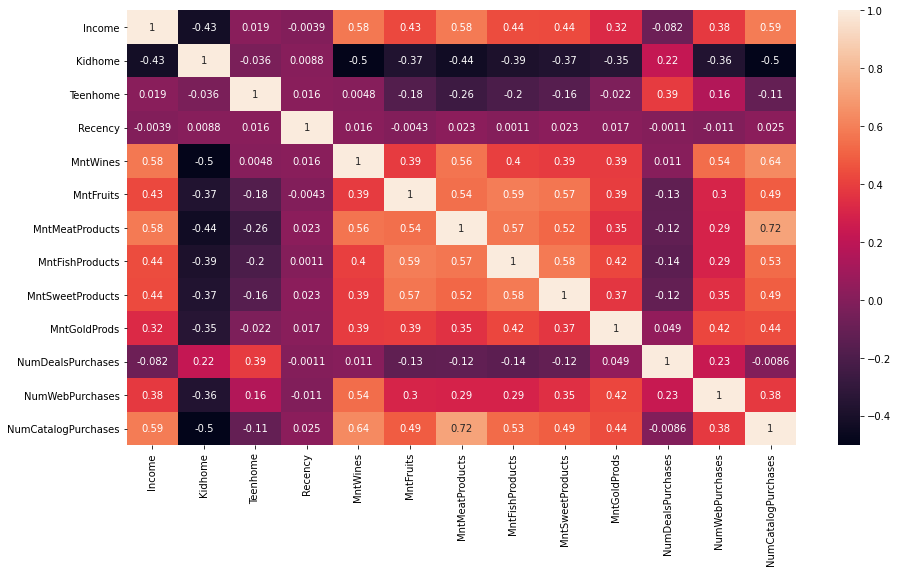

In [13]:
# Plotting the correlation between numerical variables
rels = edf.iloc[:, 1:16]
corr = rels.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(corr, annot=True)

# Preprocessing

In [14]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df,dummies], axis=1)
    df = df.drop(column, axis=1)
    return df 

In [16]:
def preprocess_inputs(df):
    df.copy()

    #Drop ID column
    df = df.drop('ID', axis=1)

    #Fill missing values in Income column with column mean
    df['Income']= df['Income'].fillna(df['Income'].mean())

    #Encoding the date column
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']) #convert to datetime 
    df['Year_Customer'] = df['Dt_Customer'].apply(lambda x: x.year) # creat a year column
    df['Month_Customer'] = df['Dt_Customer'].apply(lambda x: x.month) # creat a year column
    df['Day_Customer'] = df['Dt_Customer'].apply(lambda x: x.day)
    df = df.drop('Dt_Customer', axis=1) # drop the original date column

    # Onehot_Encode
    for column in ['Education', 'Marital_Status']:
        df = onehot_encode(df, column=column)
    
    # Split the dataset into X , y
    y = df['Response']
    X = df.drop('Response', axis=1)

    # Slpit the X and y into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # Scale X_train and X_test
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


    return X_train, X_test, y_train, y_test

In [17]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [18]:
X_train

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Year_Customer,Month_Customer,Day_Customer,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
1747,-1.913598,0.666182,-0.818551,-0.928565,-0.943047,0.940445,-0.000399,0.118913,-0.058848,-0.242557,1.899016,-0.670921,0.670017,0.444401,2.197888,-1.327203,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,0.749737,1.397448,-0.304439,-0.157596,-1.003834,2.242938,-0.536056,-0.035737,-0.043783,-0.332388,1.265042,-0.535070,-0.589134,-0.181489,-0.025262
115,-0.573780,-0.073000,1.038884,0.909806,-0.736818,-0.715194,-0.626743,-0.641544,-0.676671,-0.627602,-0.309914,-0.151413,-0.725185,-0.562565,-0.848420,0.297986,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,0.749737,-0.632170,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,-0.332388,-0.790487,1.868913,-0.589134,-0.181489,-0.025262
1739,0.179867,-0.459033,1.038884,-0.928565,-1.046162,-0.840260,-0.626743,-0.685248,-0.676671,-0.531341,-0.774952,-0.670921,-1.073985,-0.898221,-0.848420,1.110581,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,1.616052,-0.519414,-0.304439,-0.157596,-1.003834,-0.445844,1.865476,-0.035737,-0.043783,-0.332388,1.265042,-0.535070,-0.589134,-0.181489,-0.025262
336,-0.071349,1.074137,-0.818551,-0.928565,-1.321134,1.467509,3.181427,0.547217,0.631660,1.682671,-0.251784,-0.670921,2.414019,0.444401,0.065472,-0.514609,-0.267900,3.571328,3.571328,3.791114,-0.113666,-0.101535,0.0,0.0,-1.517709,1.616052,-1.083196,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,3.008535,-0.790487,-0.535070,-0.589134,-0.181489,-0.025262
2031,-1.159951,0.684143,-0.818551,0.909806,-1.527363,0.032226,0.225084,0.673960,0.159207,-0.483210,1.937769,0.368095,1.018818,-0.226910,1.588626,-0.108311,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-0.071042,1.327280,1.171935,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,-0.332388,1.265042,-0.535070,-0.589134,-0.181489,-0.025262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,-0.155087,0.841743,-0.818551,0.909806,0.569301,0.764756,1.477772,0.014023,-0.222389,2.308370,1.375848,-0.151413,-0.027584,1.451367,2.197888,-1.327203,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,-1.517709,0.749737,0.608152,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,3.008535,-0.790487,-0.535070,-0.589134,-0.181489,-0.025262
905,0.682299,1.506086,-0.818551,-0.928565,1.566075,0.565246,1.653148,0.975520,2.848553,-0.386949,3.836673,-0.670921,-0.376384,0.444401,1.283995,-2.139798,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,1.375626,-0.694119,-0.744927,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,-0.332388,-0.790487,1.868913,-0.589134,-0.181489,-0.025262
1096,-0.908735,1.263423,-0.818551,0.909806,0.191214,0.803467,-0.451367,0.210693,-0.295074,-0.266622,-0.193655,-0.670921,-0.027584,0.108746,-0.239158,-1.733501,-0.267900,-0.280008,-0.280008,-0.263775,-0.113666,-0.101535,0.0,0.0,1.375626,-0.116577,-1.534223,-0.304439,-0.157596,0.996181,-0.445844,-0.536056,-0.035737,-0.043783,3.008535,-0.790487,-0.535070,-0.589134,-0.181489,-0.025262
235,0.514822,-1.388929,1.038884,-0.928565,0.019356,-0.890882,-0.426313,-0.645914,-0.567643,-0.459145,-0.426173,-0.151413,-0.725185,-0.898221,-0.543789,0.297986,-0.26

In [19]:
y_train

1747    0
115     0
1739    0
336     1
2031    0
       ..
960     0
905     0
1096    0
235     0
1061    0
Name: Response, Length: 1568, dtype: int64

# Training the Model

In [21]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
        ]
)

history = model.fit(
    X_train, 
    y_train, 
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
40/40 [==============================] - 2s 14ms/step - loss: 0.4089 - accuracy: 0.8278 - auc: 0.6785 - val_loss: 0.3536 - val_accuracy: 0.8822 - val_auc: 0.8135
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2863 - accuracy: 0.8844 - auc: 0.8665 - val_loss: 0.2990 - val_accuracy: 0.8885 - val_auc: 0.8681
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2446 - accuracy: 0.9003 - auc: 0.9098 - val_loss: 0.2669 - val_accuracy: 0.9013 - val_auc: 0.8920
Epoch 4/100
40/40 [==============================] - 0s 6ms/step - loss: 0.2218 - accuracy: 0.9107 - auc: 0.9280 - val_loss: 0.2639 - val_accuracy: 0.9076 - val_auc: 0.8973
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.2059 - accuracy: 0.9203 - auc: 0.9378 - val_loss: 0.2691 - val_accuracy: 0.9045 - val_auc: 0.8949
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1872 - accuracy: 0.9250 - auc: 0.9523 - val_loss: 0.2606 - 

# Model Evaluation

In [22]:
results = model.evaluate(X_test, y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))
print("     Test AUC: {:.5f}".format(results[2]))

    Test Loss: 0.25348
Test Accuracy: 88.84%
     Test AUC: 0.91411


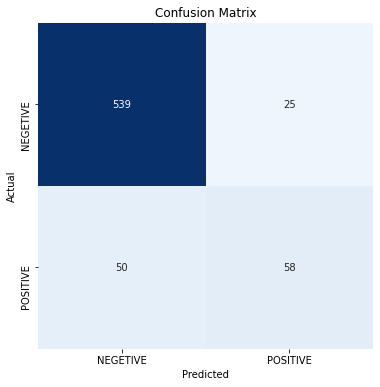

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGETIVE       0.92      0.96      0.93       564
    POSITIVE       0.70      0.54      0.61       108

    accuracy                           0.89       672
   macro avg       0.81      0.75      0.77       672
weighted avg       0.88      0.89      0.88       672



In [23]:
y_pred = np.array(model.predict(X_test) >= 0.5, dtype=np.int)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=["NEGETIVE", "POSITIVE"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=["NEGETIVE", "POSITIVE"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["NEGETIVE", "POSITIVE"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)